In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("ml_case_training_data.csv")
hist_data = pd.read_csv("ml_case_training_hist_data.csv")
train_out = pd.read_csv("ml_case_training_output.csv")

In [3]:
train_data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
# tarin_data - We can see that some parameters have NaN value or '0' value
hist_data.tail()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [5]:
# hist_data - hist_data does not seem to have much inconsistency. We can check it by printing its head.
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
# hist_data - some parameters have a zero value
train_out.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [7]:
# train_out - churn data seems to have consistency.
# Let's merge 'train_data' with 'train_out'.
train = pd.merge(train_data, train_out, on ='id')

In [8]:
# Lets have a look at train data
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [9]:
# Before going further, let's check the datatypes of various parameters
pd.DataFrame({"Data Type":train.dtypes})

,Data Type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [10]:
# All datatypes except date is in actionable format. We need to change the datatype of date via datetime module.
pd.DataFrame({"Data type":hist_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [11]:
# Here as well we need to change format for date.
# Lets check for duplicacy in rows of dataframes.
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)*100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [12]:
pd.DataFrame({"Missing values (%)": hist_data.isnull().sum()/len(hist_data.index)*100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In [13]:
# hist_data does not have much of anomaly, but train have greater amount of null values.
# we can tackle this by replacing the zero values with the measures of central tendency i.e. mean or median in case
# of hist_data, whereas in case of train data, we can drop the parameters with greater than 50% null values.
# Let us see descriptive statistics for dataframes before moving forward.
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [14]:
# the minimum value representing the electricity/gas use is negative, which is not possible because the PowerCo is the 
# supplier of the energy and not the consumer. We will tackle this issue by making these values positive.
# The standard deviation is much more than the mean as well as quartile values are also varying a lot. Hence we will have
# to look out for the outliers. We can do do by plotting the box plots which will represent the variation of the specific
# parameter from the median value of that parameter. We can either remove the outliers or we can replace them with the median
# value here as well.
# The churn is faced by about 0.099093 fraction of the clients, which means roughly 10% of the clients are facing the churn
# hence the claim by the PowerCo that their customers are facing the turn is strong.
# Let's have a look at historic data
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [15]:
# some of the parameters which represents pricing are negative. We will make them positive as the price can not be negative.
# The historic data seems in a good condition with fewer inconsistencies.
# Let's have a look at each and every parameter separately, before cleaning the data and correcting the format of the data.
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def boxplotter(param):
    sns.boxplot(data = param)
    plt.figure()

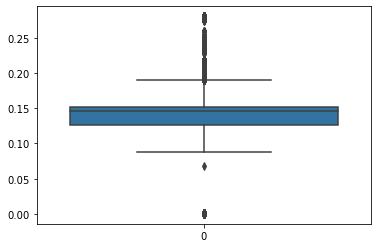

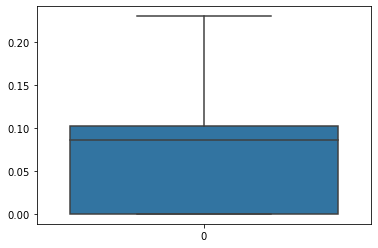

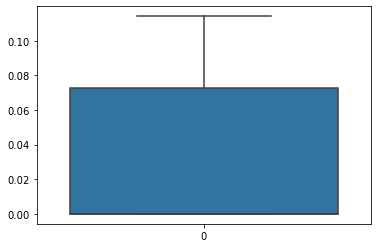

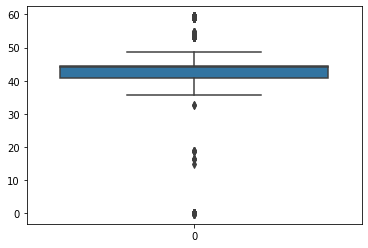

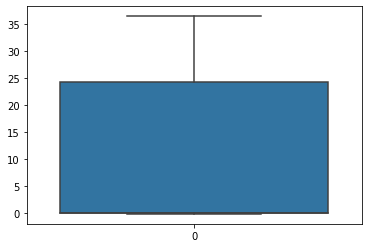

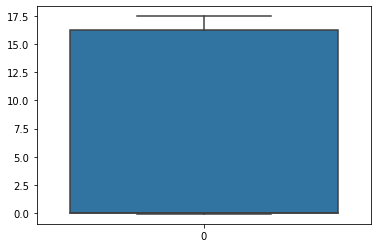

<Figure size 432x288 with 0 Axes>

In [17]:
i = 2
while i<=7:
    boxplotter(hist_data.iloc[:,i])
    i += 1

<AxesSubplot:>

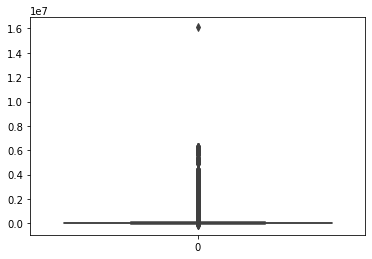

In [18]:
sns.boxplot(data = train.cons_12m)

<AxesSubplot:>

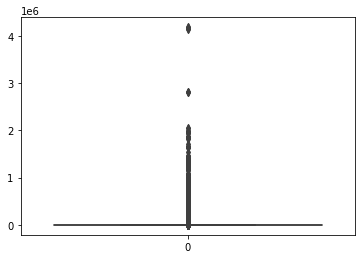

In [19]:
sns.boxplot(data = train.cons_gas_12m)

<AxesSubplot:>

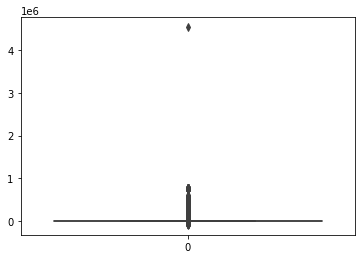

In [20]:
sns.boxplot(data = train.cons_last_month)

<AxesSubplot:>

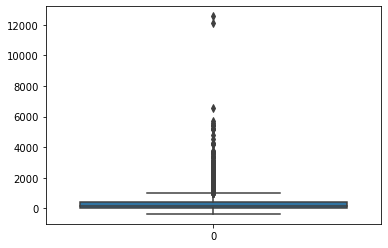

In [21]:
sns.boxplot(data = train.forecast_base_bill_ele)

<AxesSubplot:>

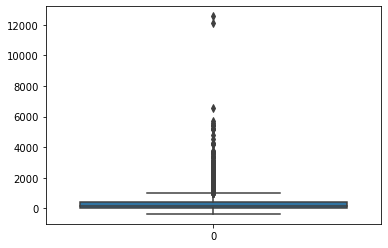

In [22]:
sns.boxplot(data = train.forecast_base_bill_year)

<AxesSubplot:>

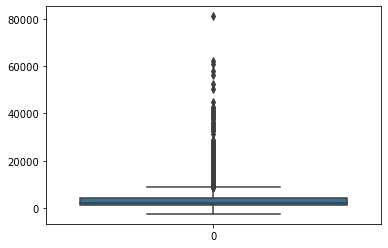

In [23]:
sns.boxplot(data = train.forecast_bill_12m)

<AxesSubplot:>

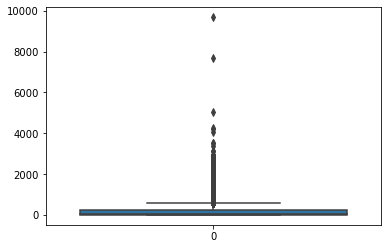

In [24]:
sns.boxplot(data = train.forecast_cons)

<AxesSubplot:>

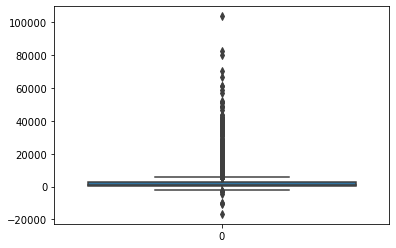

In [25]:
sns.boxplot(data = train.forecast_cons_12m)

<AxesSubplot:>

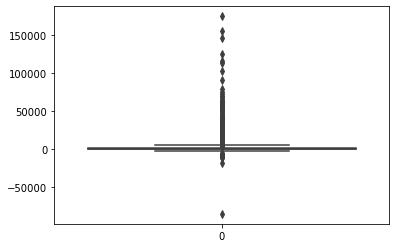

In [26]:
sns.boxplot(data = train.forecast_cons_year)

<AxesSubplot:>

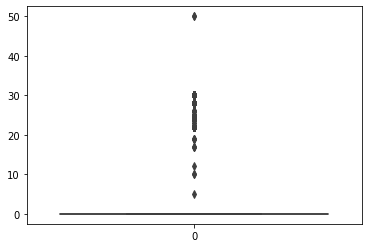

In [27]:
sns.boxplot(data = train.forecast_discount_energy)

<AxesSubplot:>

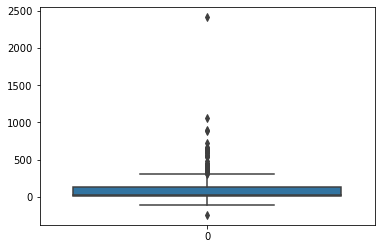

In [28]:
sns.boxplot(data = train.forecast_meter_rent_12m)

<AxesSubplot:>

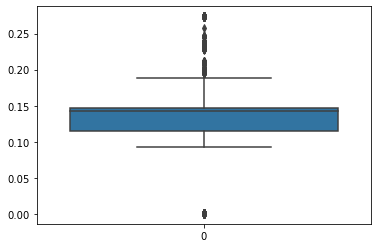

In [29]:
sns.boxplot(data = train.forecast_price_energy_p1)

<AxesSubplot:>

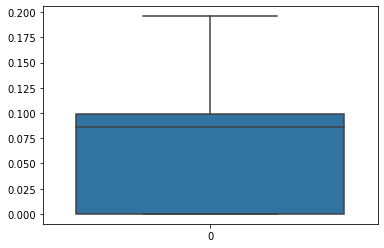

In [30]:
sns.boxplot(data = train.forecast_price_energy_p2)

<AxesSubplot:>

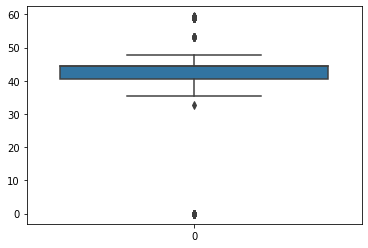

In [31]:
sns.boxplot(data = train.forecast_price_pow_p1)

<AxesSubplot:>

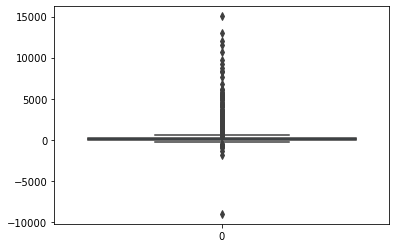

In [32]:
sns.boxplot(data = train.imp_cons)

<AxesSubplot:>

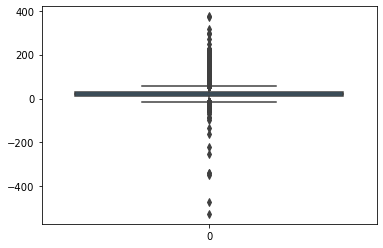

In [33]:
sns.boxplot(data = train.margin_gross_pow_ele)

<AxesSubplot:>

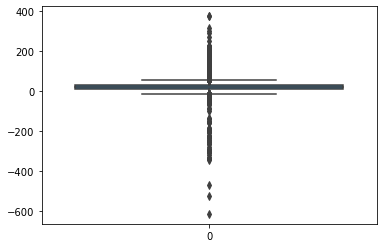

In [34]:
sns.boxplot(data = train.margin_net_pow_ele)

<AxesSubplot:>

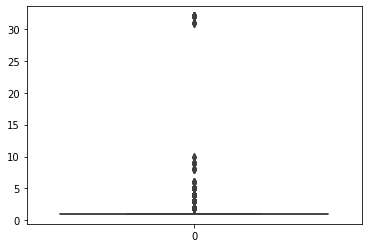

In [35]:
sns.boxplot(data = train.nb_prod_act)

<AxesSubplot:>

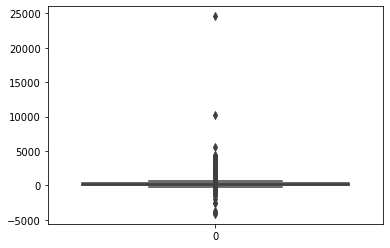

In [36]:
sns.boxplot(data = train.net_margin)

<AxesSubplot:>

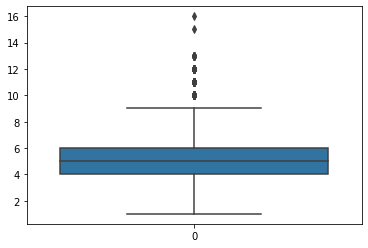

In [37]:
sns.boxplot(data = train.num_years_antig)

<AxesSubplot:>

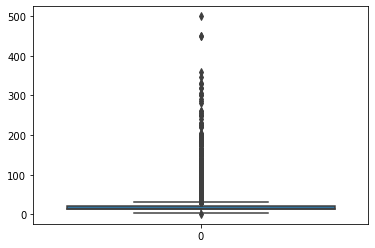

In [38]:
sns.boxplot(data = train.pow_max)

In [39]:
import datetime as dt

In [40]:
dates = train[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [41]:
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

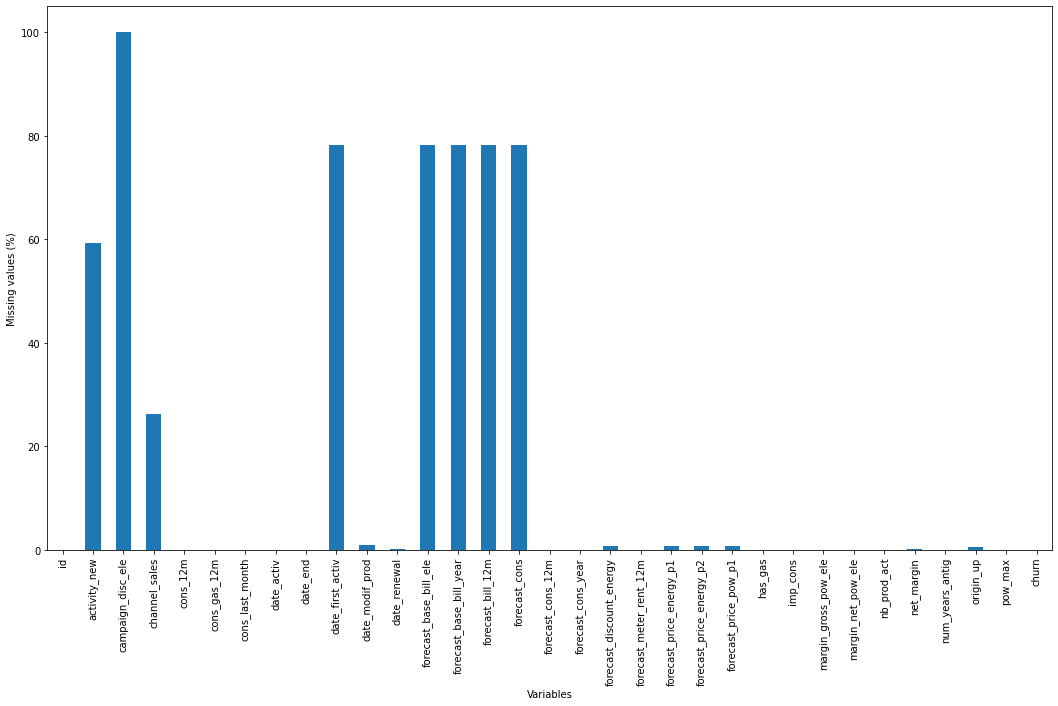

In [42]:

# Plot missing data
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [43]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

In [44]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [45]:
train.loc[train["date_modif_prod"].isnull(),"date_modif_prod"] = train["date_modif_prod"].value_counts().index[0]
train.loc[train["date_end"].isnull(),"date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(),"date_renewal"] = train["date_renewal"].value_counts().index[0]

In [46]:
missing_data_percentage = hist_data.isnull().sum()/len(hist_data.index)*100

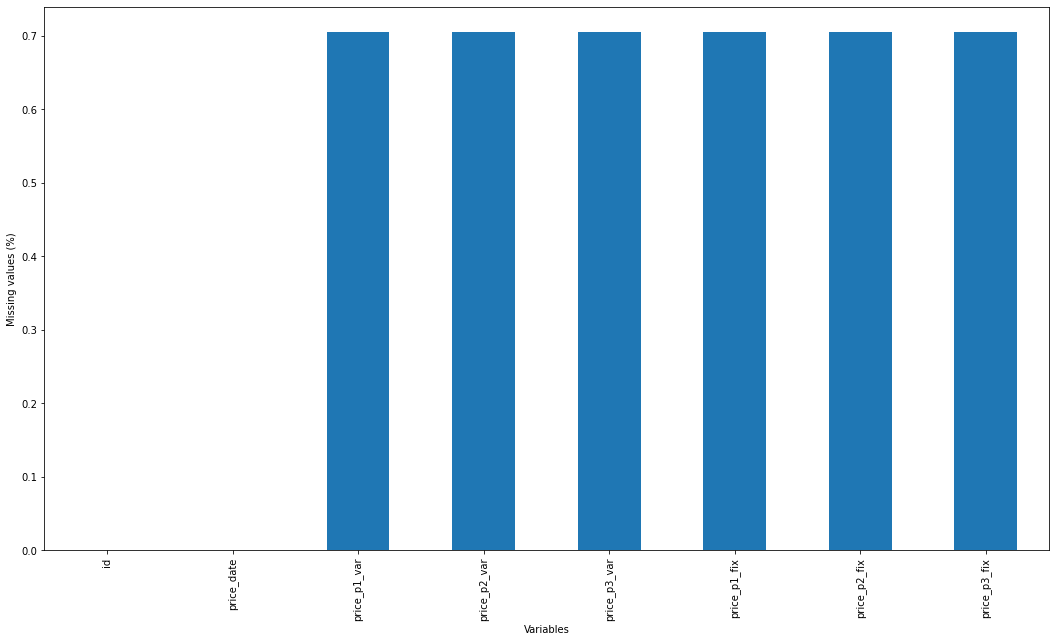

In [47]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))
# Set labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

In [48]:
hist_data[hist_data.isnull().any(axis=1)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
75,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
221,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
377,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
413,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
461,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
192767,2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192788,e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
192875,1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
192876,1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
hist_data.loc[hist_data["price_p1_var"].isnull(),"price_p1_var"] = hist_data["price_p1_var"].median()
hist_data.loc[hist_data["price_p2_var"].isnull(),"price_p2_var"] = hist_data["price_p2_var"].median()
hist_data.loc[hist_data["price_p3_var"].isnull(),"price_p3_var"] = hist_data["price_p3_var"].median()
hist_data.loc[hist_data["price_p1_fix"].isnull(),"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"].isnull(),"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"].isnull(),"price_p3_fix"] = hist_data["price_p3_fix"].median()

In [50]:
hist_data["price_date"] = pd.to_datetime(hist_data["price_date"], format='%Y-%m-%d')

In [51]:
# Transform date columns to datetime type
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

In [52]:
hist_data[(hist_data.price_p1_fix < 0) | (hist_data.price_p2_fix < 0) | (hist_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [53]:
hist_data.loc[hist_data["price_p1_fix"] < 0,"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] < 0,"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] < 0,"price_p3_fix"] = hist_data["price_p3_fix"].median()

In [54]:
import os
import pickle
DATA_DIR = os.path.join("..", "ml_case_data")
TRAINING_DATA = os.path.join(DATA_DIR, "ml_case_training_data.csv")
HISTORY_DATA = os.path.join(DATA_DIR, "ml_case_training_hist_data.csv")
CHURN_DATA = os.path.join(DATA_DIR, "ml_case_training_output.csv")

In [55]:
if not os.path.exists(os.path.join("..", "processed_data")):
 os.makedirs(os.path.join("..", "processed_data"))

In [56]:
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "hist_data.pkl")

In [57]:
pd.to_pickle(train, PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data, PICKLE_HISTORY_DIR)